# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- matplotlib: https://matplotlib.org/stable/users/installing/index.html

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Q3 - Implementing dynamic programming algorithms in the GridWorld domain.

In this question, you are asked to implement the **value iteration** (See the pseudocode on page 83) and **policy iteration** (See the pseudocode on page 80). 

- The implementation of the GridWorld is given in the follow **GridWorld** class. Please use it to compute the dynamics and the reward
- Please implement the value iteration and policy iteration in the following blocks. 

In [2]:
"""DO NOT CHANGE THIS BLOCK"""
# The GridWorld domain in Example 3.5
class GridWorld(object):
    def __init__(self):
        # define the state space
        self.state_space = [
            [0, 0], [0, 1], [0, 2], [0, 3], [0, 4],
            [1, 0], [1, 1], [1, 2], [1, 3], [1, 4],
            [2, 0], [2, 1], [2, 2], [2, 3], [2, 4],
            [3, 0], [3, 1], [3, 2], [3, 3], [3, 4],
            [4, 0], [4, 1], [4, 2], [4, 3], [4, 4]
        ]

        # define special states
        self.A, self.B = np.array([0, 1]), np.array([0, 3])
        self.A_prime, self.B_prime = np.array([4, 1]), np.array([2, 3])

        # define the action space
        self.action_space = {
            "north": [-1, 0],
            "south": [1, 0],
            "west": [0, -1],
            "east": [0, 1]
        }

    def reset(self):
        pass

    def step(self, s, a) -> (list, float):
        """
        Args:
            s (list): a list contains the position of the current state
            a (str): name of the action
        """
        # convert the state to numpy array
        s_arr = np.array(s)
        # convert the action to numpy array
        a_arr = np.array(self.action_space[a])

        # compute the next state and reward using the dynamics function
        next_s, r = self.dynamics_func(s_arr, a_arr)

        # return the next state and the reward
        return next_s, r

    def dynamics_func(self, s_arr, a_arr) -> (list, float):
        """
        Args:
            s_arr (numpy.array): numpy array contains the position of the current state
            a_arr (numpy.array): numpy array contains the change of the current state
        """
        # check for special states A and B
        # From state A, all four actions yield a reward of +10 and take the agent to A_prime
        if np.array_equal(s_arr, self.A):
            return self.A_prime.tolist(), 10.0

        # From state B, all actions yield a reward of +5 and take the agent to B prime.
        if np.array_equal(s_arr, self.B):
            return self.B_prime.tolist(), 5.0

        # check for normal states
        # compute the next state position and reward
        next_s = s_arr + a_arr
        if next_s.tolist() not in self.state_space:
            # Actions that would take the agent off the grid leave its location unchanged, but also result in a reward
            # of -1
            return s_arr.tolist(), -1.0
        else:
            # Other actions result in a reward of 0
            return next_s.tolist(), 0.0

In [3]:
"""DO NOT CHANGE THIS BLOCK"""
# Function to print the optimal state value
def print_optimal_state_value(s_v):
    """
    Args:
        s_v (numpy.array): a 2-D numpy array contains the optimal state values with size 5 x 5
    """
    print("=============================")
    print("==  Optimal State Value    ==")
    print("=============================")  
    print(s_v.round(decimals=1))
    print("=============================")

# Function to print the optimal policy 
def print_optimal_policy(s_v, env, ga):
    """
    Args:
        s_v (numpy.array): a 2-D numpy array contains the optimal state value with size 5 x 5
        env (env): the grid-world environment
        ga (float): gamma 
    """
    print("=============================")
    print("==     Optimal Policy      ==")
    print("=============================")
    action_names = list(env.action_space.keys())
    for i in range(5):
        for j in range(5):
            q_v = []
            for a in env.action_space.keys():
                next_s, r = env.step([i, j], a)
                q_v.append(r + ga * s_v[next_s[0], next_s[1]])
            q_v = np.array(q_v)

            actions = np.where(q_v == q_v.max())[0]
            actions = [action_names[a] for a in actions]

            print(f"{[i, j]} = {actions}")
        print("------------------------------")

## Q3 - (a): Implement value iteration. Please complete the implementation of the value iteration below.

In [4]:
# We provide the scaffolding code of running the value iteration 
# Please implement the value iteration algorithm below """CODE HERE"""
def run_value_iteration(env, threshold, gamma):
    """
    Args: 
        env: the grid-world environment, we use it to compute:
            - the next state: s'
            - the transition probability: p(s'|s,a)
            - the reward : r
        threshold: threshold determining the estimation threshold
        gamma: the discounted factor
        
        Note: we use the vanilla implementation, where we maintain two separate numpy arrays to store the
              state value and the updated state value. 
    """
    # initialize the state value to be 0
    state_value = np.zeros((5, 5))
    
    # iteration counter
    iter_counter = 0

    # loop forever
    while True:
        # Logic: assuming the value iteration should be terminated for the current iteration
        # unless there exists one state whose value estimation error > threshold. i.e. (abs(new_v - old_v) > threshold)
        is_terminal = True

        # save the new state value
        new_state_value = np.zeros_like(state_value)

        # loop all states 
        # each state is the position of the agent in the grid. e.g., [i, j]
        # where i, j in [0, 4]
        for i in range(5):
            for j in range(5):
                """ CODE HERE """
                # obtain the current state value estimation
                old_v = state_value[i, j]
                
                # compute the updated state value V(s) using equation 4.10.
                # note that, 
                # 1. Use p(s'|s, a) rather than p(s', r|s, a).
                # 2. The environment is deterministic. In other words, there is only one
                #    possible s' and r given s and a.
                action_values = []
                for action in env.action_space.keys():
                    next_state, reward = env.step([i, j], action)
                    v_s = reward + gamma * state_value[next_state[0], next_state[1]]
                    action_values.append(v_s)
                new_v = max(action_values)
                                
                # check the termination
                # set is_terminal = False if |new_v - old_v| > threshold
                if abs(new_v - old_v) > threshold:
                    is_terminal = False
                
                new_value = new_v
                
                """DO NOT CHANGE BELOW"""
                # store the updated value in the new_state_value
                new_state_value[i, j] = new_value

        # update the current state value with the updated values
        state_value = new_state_value.copy()
        
        # terminate the loop 
        if is_terminal:
            break

    return state_value


In [5]:
"""DO NOT CHANGE: it is used to run the value iteration above"""
# run value iteration (DO NOT CHANGE)
# create the envrionment
my_grid = GridWorld()
my_grid.reset()

# threshold determining the accuracy of the estimation
threshold = 1e-3

# discounted factor
gamma = 0.8

# run the value iteration
state_value = run_value_iteration(my_grid, threshold, gamma)

# print the optimal state value
print_optimal_state_value(state_value)

# print the optimal policy
print_optimal_policy(state_value, my_grid, gamma)

==  Optimal State Value    ==
[[11.9 14.9 11.9 10.2  8.2]
 [ 9.5 11.9  9.5  8.2  6.6]
 [ 7.6  9.5  7.6  6.6  5.2]
 [ 6.1  7.6  6.1  5.2  4.2]
 [ 4.9  6.1  4.9  4.2  3.4]]
==     Optimal Policy      ==
[0, 0] = ['east']
[0, 1] = ['north', 'south', 'west', 'east']
[0, 2] = ['west']
[0, 3] = ['north', 'south', 'west', 'east']
[0, 4] = ['west']
------------------------------
[1, 0] = ['north', 'east']
[1, 1] = ['north']
[1, 2] = ['north', 'west']
[1, 3] = ['north']
[1, 4] = ['north', 'west']
------------------------------
[2, 0] = ['north', 'east']
[2, 1] = ['north']
[2, 2] = ['north', 'west']
[2, 3] = ['north']
[2, 4] = ['north', 'west']
------------------------------
[3, 0] = ['north', 'east']
[3, 1] = ['north']
[3, 2] = ['north', 'west']
[3, 3] = ['north']
[3, 4] = ['north', 'west']
------------------------------
[4, 0] = ['north', 'east']
[4, 1] = ['north']
[4, 2] = ['north', 'west']
[4, 3] = ['north']
[4, 4] = ['north', 'west']
------------------------------


## Q3 - (b): Implement policy iteration

In [6]:
# We provide the scaffolding code of implement the policy evaluation
# Please implement the value iteration algorithm below """CODE HERE"""
def policy_evaluation(env, policy, threshold, gamma):
    """
    Args:
        env: the grid-world environment, we use it to compute:
            - the next state: s'
            - the transition probability: p(s'|s,a)
            - the reward : r
        policy (numpy.array): a 2-D numpy array stores the action to take at each location.
        threshold (float): threshold determining the estimation threshold
        gamma (float): the discounted factor
        
        Note: we use the vanilla implementation, where we maintain two separate numpy arrays to store the
              state value and the updated state value. 
    """
    # initialize the state values
    state_value = np.zeros((5, 5))

    # start evaluate the current policy
    while True:
        # set terminal flag similar to the value iteration flag.
        is_terminal = True

        # new state value
        new_state_value = np.zeros_like(state_value)

        # loop all states
        for i in range(5):
            for j in range(5):
                """ CODE HERE """
                # store the old state value
                old_v = state_value[i, j]
                
                # update the state value using the equation 4.5
                # Hints: how many next state are there given a deterministic policy and 
                # a deterministic environment.
                # Since there is only one next state, we can directly use the policy to get the action   
                actions = list(env.action_space.keys())
                action = actions[int(policy[i, j])]
                next_state, reward = env.step([i, j], action)
                new_v = reward + gamma * state_value[next_state[0], next_state[1]]

                # check termination
                # set is_terminal = False if |new_v - old_v| > threshold
                if abs(new_v - old_v) > threshold:
                    is_terminal = False
                    
                """ DO NOT CHANGE BELOW """
                # store the updated state value for state [i, j]
                new_state_value[i, j] = new_v

        # update state value
        state_value = new_state_value.copy()

        # check termination
        if is_terminal:
            break

    return state_value


#################################
# Implement policy improvement
################################
def policy_improvement(env, policy, state_value, gamma):
    # set the policy improvement flag
    policy_stable = True
    
    # loop all states
    for i in range(5):
        for j in range(5):
            """ CODE HERE """
            # store the old action
            old_a = policy[i, j]

            # compute a new greedy action based on the latest state value
            actions = list(env.action_space.keys())
            action_values = []
            for a in actions:
                next_state, reward = env.step([i, j], a=a)
                q_val = reward + gamma * state_value[next_state[0], next_state[1]]
                action_values.append(q_val)
            new_a = np.argmax(action_values)
                        
            # check if the policy is stable
            if old_a != new_a:
                policy_stable = False
             
            """ DO NOT CHANGE BELOW"""
            # update the policy with the new greedy policy
            policy[i, j] = new_a

    return policy.astype(int), policy_stable

In [7]:
"""DO NOT CHANGE: it is used to run the policy iteration above"""
# run policy iteration (DO NOT CHANGE)
my_grid = GridWorld()
my_grid.reset()

# threshold and gamma
threshold, gamma = 1e-3, 0.8

# initialize a policy
policy = np.random.randint(low=0, high=4, size=(5, 5))

# run policy iteration
while True:
    # policy evaluation
    state_value = policy_evaluation(my_grid, policy, threshold, gamma)

    # policy improvement
    policy, policy_stable = policy_improvement(my_grid, policy, state_value, gamma)

    # check if policy is stable
    if policy_stable:
        break

# print the optimal state value
print_optimal_state_value(state_value)

# print the optimal policy
print_optimal_policy(state_value, my_grid, gamma)

==  Optimal State Value    ==
[[11.9 14.9 11.9 10.2  8.2]
 [ 9.5 11.9  9.5  8.2  6.6]
 [ 7.6  9.5  7.6  6.6  5.2]
 [ 6.1  7.6  6.1  5.2  4.2]
 [ 4.9  6.1  4.9  4.2  3.4]]
==     Optimal Policy      ==
[0, 0] = ['east']
[0, 1] = ['north', 'south', 'west', 'east']
[0, 2] = ['west']
[0, 3] = ['north', 'south', 'west', 'east']
[0, 4] = ['west']
------------------------------
[1, 0] = ['north', 'east']
[1, 1] = ['north']
[1, 2] = ['north', 'west']
[1, 3] = ['north']
[1, 4] = ['north', 'west']
------------------------------
[2, 0] = ['north', 'east']
[2, 1] = ['north']
[2, 2] = ['north', 'west']
[2, 3] = ['north']
[2, 4] = ['north', 'west']
------------------------------
[3, 0] = ['north', 'east']
[3, 1] = ['north']
[3, 2] = ['north', 'west']
[3, 3] = ['north']
[3, 4] = ['north', 'west']
------------------------------
[4, 0] = ['north', 'east']
[4, 1] = ['north']
[4, 2] = ['north', 'west']
[4, 3] = ['north']
[4, 4] = ['north', 'west']
------------------------------


# Q5 - Gamber's Problem

In [39]:
def states(target=100):
    for s in range(1, target):
        yield s

In [40]:
def step(action, state, V, ph, gamma=1, target=100):
    action_return = 0

    # success
    sp = min(state + action, target)
    reward = 1 if (sp == target) else 0
    action_return += ph * (reward + gamma * V[sp])

    # fail
    sp = max(state - action, 0)
    reward = 0  # gambler's problem typically has 0 reward unless hitting target
    action_return += (1 - ph) * (reward + gamma * V[sp])

    return action_return

In [44]:
import numpy as np

def value_iteration(target=100, ph=0.25):
    # Initialize value function V with zeros for all states (0 to target)
    V = np.zeros(target + 1)
    
    # Initialize policy array pi with undefined values
    pi = np.empty(target + 1, dtype=int)
    
    # Set terminal states to 0 (no action required)
    pi[0] = 0
    pi[target] = 0

    # Convergence threshold to determine when value iteration stops
    theta = 1e-9
    
    # Initialize delta to track the maximum change in value updates
    delta = 1
    
    # Counter for tracking iterations
    iteration = 0

    # List to store history of value functions for analysis
    value_function_history = []

    # Iterate until the change in value function is smaller than the threshold
    while delta > theta:
        iteration += 1  # Increment iteration count
        delta = 0  # Reset delta for this iteration
        
        # Store the current value function to track progress
        value_function_history.append(V.copy())

        """ CODE HERE """
        # Loop through all valid states (excluding terminal states)
        for s in states(target):
            # TODO: Store old value for convergence check
            v_old = V[s]
            # TODO: Store returns for all possible actions
            action_returns = []

            # Consider all possible bet sizes (valid actions)
            for a in range(0, min(s, target - s) + 1):
                # TODO: Compute expected return for taking action 'a' in state 's'
                action_return = step(a, s, V, ph=ph, gamma=1, target=target)
                action_returns.append(action_return)

            # Update the value function with the best possible action return
            V[s] = max(action_returns) if action_returns else 0

            # Update delta with the maximum absolute change in value function
            delta = max(delta, abs(v_old - V[s]))

    # Store the final value function in history after convergence
    value_function_history.append(V.copy())

    # Compute the optimal policy after convergence
    for s in states(target):
        action_returns = []  # Store returns for all possible actions

        """ CODE HERE """
        # TODO: List of all possible bet sizes for the current state
        actions = list(range(0, min(s, target - s) + 1))

        # TODO: Compute returns for each possible action
        for a in actions:
            action_return = step(a, s, V, ph=ph, gamma=1, target=target)
            action_returns.append(action_return)
            
        # Choose the action that maximizes the rounded expected return
        if len(actions) > 1:
            best_idx = np.argmax(np.round(action_returns[1:], 5)) + 1
            pi[s] = actions[best_idx]
        else:
            pi[s] = 0  # If no possible bet, default to 0
    
    # Return the optimal policy and the history of value functions
    return pi, value_function_history

In [45]:
"""DO NOT CHANGE: plot function"""
def plot(target, ph, pi, value_function_history):
    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    for sweep, state_value in enumerate(value_function_history[:10]):
        plt.plot(state_value[1:100], label='sweep {}'.format(sweep), linewidth='0.9')

    if len(value_function_history)>10:
        plt.plot(value_function_history[-1][1:100], label='sweep {}'.format(len(value_function_history)-1))

    plt.title('Ph={}'.format(ph))
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')


    plt.subplot(2, 1, 2)
    plt.bar(np.arange(target + 1), pi)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    
    plt.show()

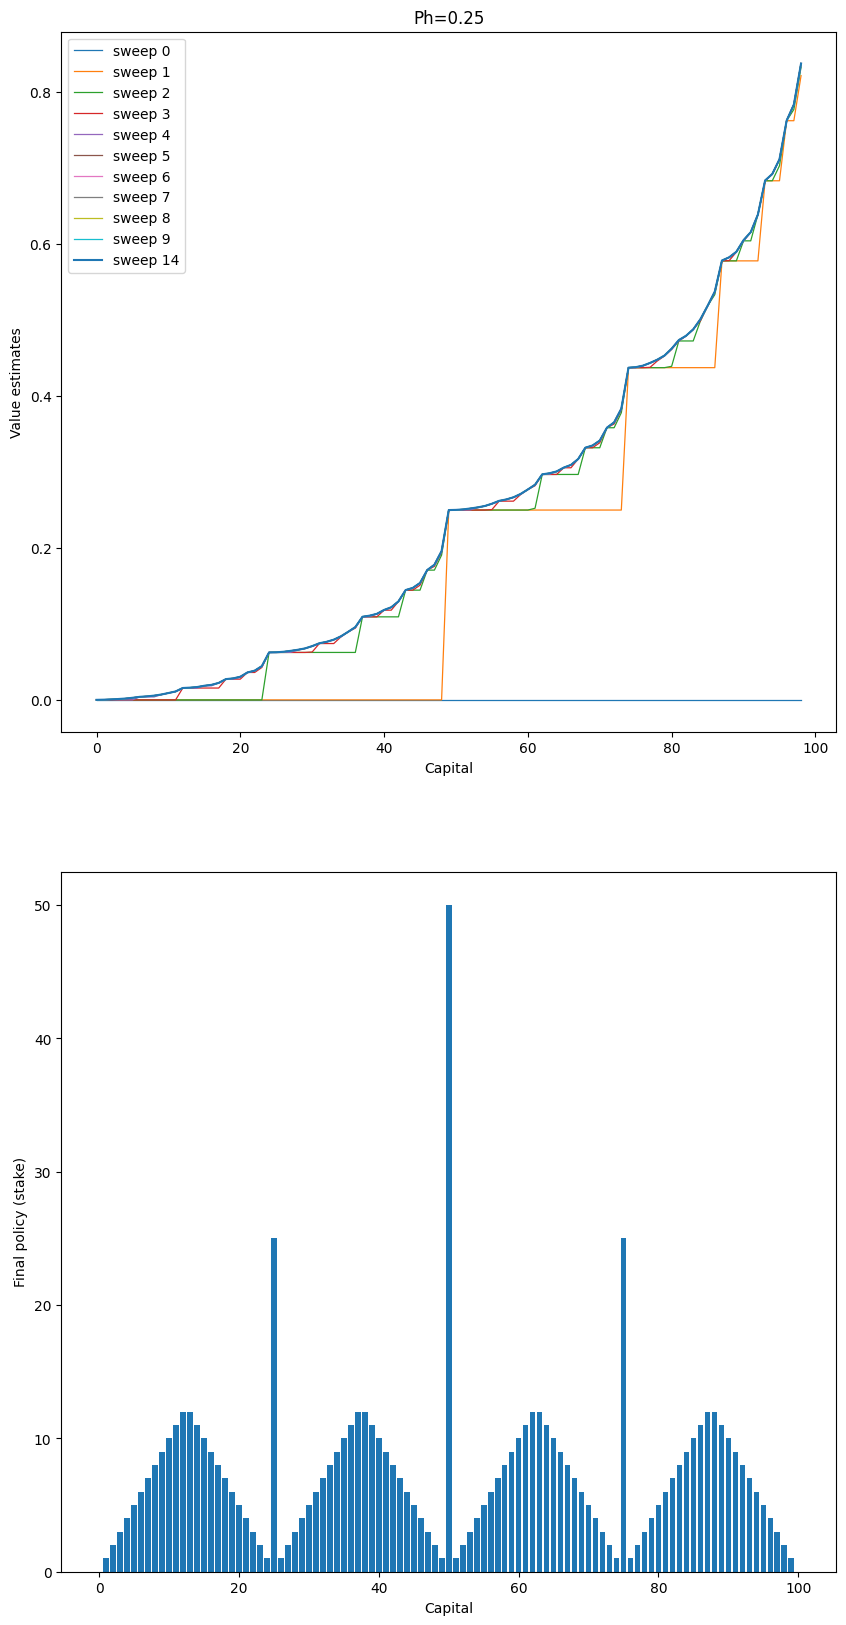

In [46]:
pi, value_function_history = value_iteration(target=100, ph=0.25)
plot(100, 0.25, pi, value_function_history)

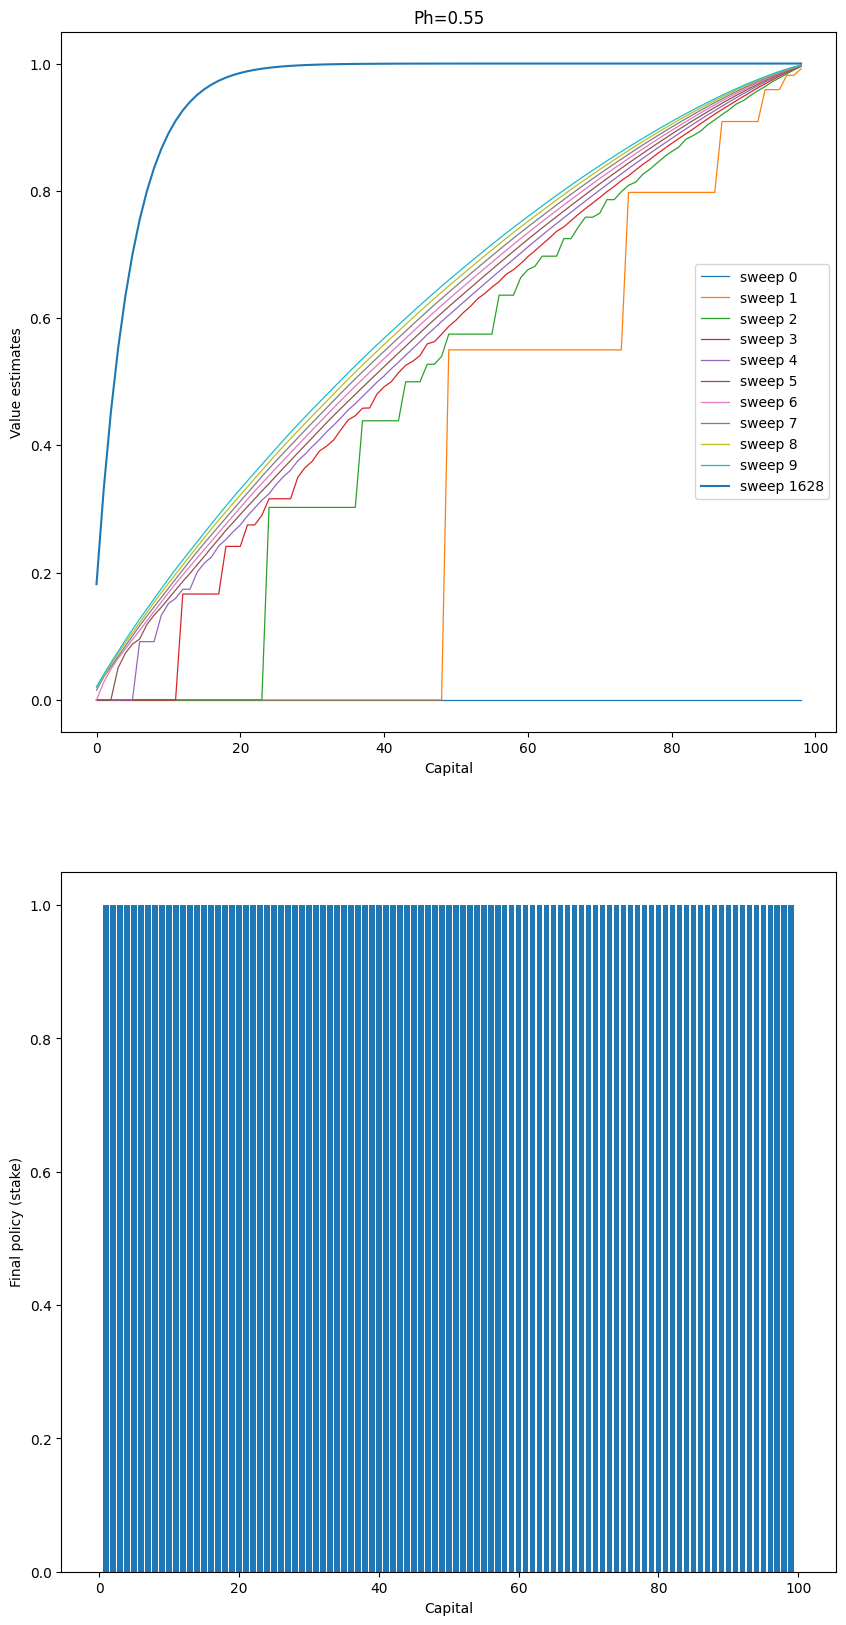

In [47]:
pi, value_function_history = value_iteration(target=100, ph=0.55)
plot(100, 0.55, pi, value_function_history)